## CubeWidget

The CubeWidget provides a visual interface to a Fits datacube using ginga/astrowidgets/ipywidgets. It is developed to function on any FITS cube in which the 1st data axis represents the spectral dim provided the WCS is included. Click on any spatial region to see the spectrum at that pixel. Use the play button to scan through wavelength space or the slider to get a specfic wavelength.

In [1]:
from astropy import units as u

from hetdex_tools.interpolate import make_data_cube
from hetdex_api.cube_widget import CubeWidget

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

### Make Your own data cube from a Detectid or SkyCoord object

In [4]:
hdu = make_data_cube(detectid=2100000335, imsize=30.*u.arcsec)
#hdu = make_data_cube(detectid=2100000335, subcont=False, dwave=10, imsize=40.*u.arcsec, pixscale=0.5*u.arcsec)

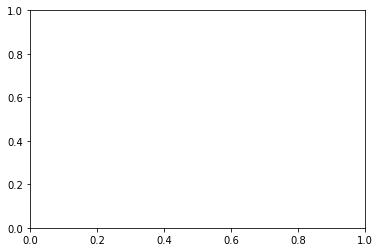

In [5]:
w = CubeWidget(hdu=hdu)

To save the datacube:

In [ ]:
hdu.writeto('data_cube.fits')

## For Data Cube Options:

In [ ]:
help(make_data_cube)

# How to find a shotid for any coords:

In [ ]:
import numpy as np
from hetdex_api.survey import FiberIndex
from astropy.coordinates import SkyCoord

In [ ]:
FibIndex = FiberIndex()

In [ ]:
star_coords = SkyCoord(176.32574, 51.514133, unit='deg')

In [ ]:
fiber_table_region = FibIndex.query_region(star_coords, radius=3.*u.arcsec, shotid=None)

In [ ]:
print("Fibers within 3 arcsec of {} are in:\n {}".format(coords, np.unique(fiber_table_region['shotid'])))

In [ ]:
hdu_star = make_data_cube(coords=star_coords, shotid=20190208022) 

In [ ]:
w = CubeWidget(hdu=hdu_star)